<a href="https://colab.research.google.com/github/machiwao/CCDEPLRL_EXERCISES_COM222/blob/main/MidtermExam_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
!pip install --upgrade --force-reinstall mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/

In [1]:
!unzip CCDEPLRL_MidtermsP2_Data.zip

Archive:  CCDEPLRL_MidtermsP2_Data.zip
   creating: CCDEPLRL_MidtermsP2_Data/
   creating: CCDEPLRL_MidtermsP2_Data/Test/
   creating: CCDEPLRL_MidtermsP2_Data/Test/Blix/
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/18e707da-922d-439f-b3a7-945bbed5e543.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250131_175932.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250131_180005.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250214_194542.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_082434.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_082558.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_082639.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_162405.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_162411.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_162418.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/Test/Blix/20250215_162423.jpg  
  inflating: CCDEPLRL_MidtermsP2_Data/

Import the libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import mediapipe as mp
from tqdm import tqdm

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [36]:
SOURCE_DIR = "CCDEPLRL_MidtermsP2_Data"
OUTPUT_DIR = "CCDEPLRL_MidtermsP2_Data_Cropped"
IMG_SIZE = 128

# Initialize Mediapipe face detector
mp_face_detection = mp.solutions.face_detection
face_detector = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.9)

# Prepare output directories
splits = ["Train", "Validation", "Test"]
for split in splits:
    for class_name in os.listdir(os.path.join(SOURCE_DIR, split)):
        os.makedirs(os.path.join(OUTPUT_DIR, split, class_name), exist_ok=True)

# Crop faces and save resized output
for split in splits:
    for class_name in os.listdir(os.path.join(SOURCE_DIR, split)):
        input_dir = os.path.join(SOURCE_DIR, split, class_name)
        output_dir = os.path.join(OUTPUT_DIR, split, class_name)

        for file in tqdm(os.listdir(input_dir), desc=f"Processing {split}/{class_name}"):
            file_path = os.path.join(input_dir, file)
            img = cv2.imread(file_path)
            if img is None:
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            result = face_detector.process(img_rgb)

            if result.detections:
                det = result.detections[0]
                bbox = det.location_data.relative_bounding_box
                h, w, _ = img.shape
                x = int(bbox.xmin * w)
                y = int(bbox.ymin * h)
                bw = int(bbox.width * w)
                bh = int(bbox.height * h)

                pad = 20
                x1 = max(x - pad, 0)
                y1 = max(y - pad, 0)
                x2 = min(x + bw + pad, w)
                y2 = min(y + bh + pad, h)

                face_crop = img[y1:y2, x1:x2]
                resized_crop = cv2.resize(face_crop, (IMG_SIZE, IMG_SIZE))
                out_path = os.path.join(output_dir, file)
                cv2.imwrite(out_path, resized_crop)

Processing Test/Jessy: 100%|██████████| 40/40 [00:01<00:00, 31.34it/s]


Hyperparameters: Set the image size and batch size

In [89]:
img_height, img_width = 128, 128
batch_size = 10

Split the images into train, validation and test

In [90]:
base_path = "CCDEPLRL_MidtermsP2_Data_Cropped"

train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_path}/Train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_path}/Validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_path}/Test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 533 files belonging to 4 classes.
Found 82 files belonging to 4 classes.
Found 155 files belonging to 4 classes.


In [91]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)

Display sample images from the dataset

ValueError: num must be an integer with 1 <= num <= 9, not 10

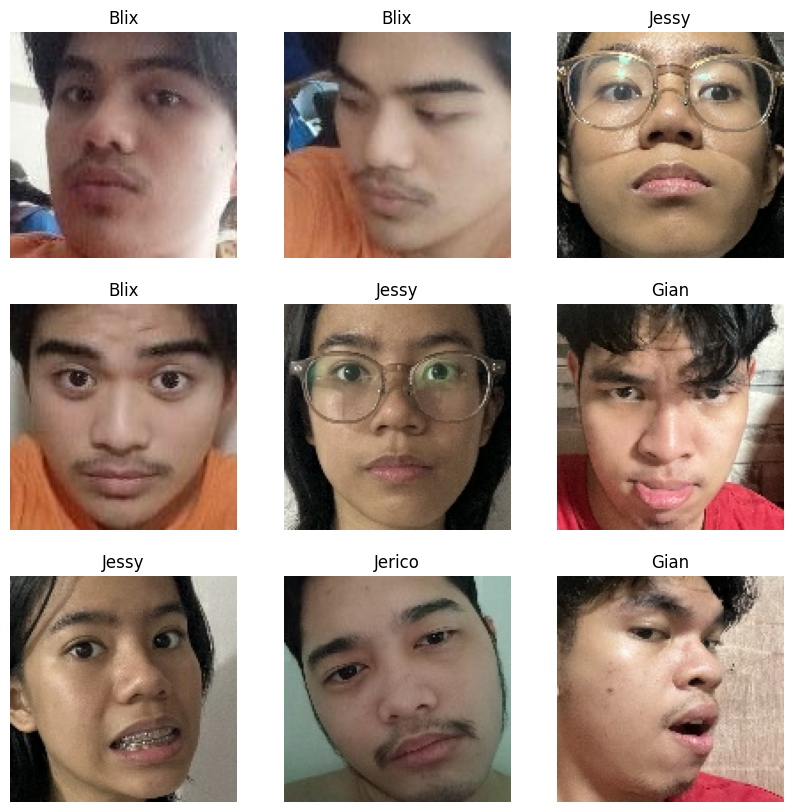

In [92]:
class_names = ["Blix", "Gian", "Jerico", "Jessy"]

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(batch_size):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [93]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')  # Final classification layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

In [96]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001,
    start_from_epoch=5
)

In [97]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Reduce LR by half
    patience=60,        # Wait 3 epochs before reducing
    min_lr=1e-7,       # Don't go below this
    min_delta=0.0001,
    verbose=1
)

Define the optimizer and loss function

In [98]:
initial_learning_rate = 0.000005
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Train the model

In [99]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 1000,
    callbacks = [early_stop, reduce_lr]
)

Epoch 1/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2984 - loss: 1.8747 - val_accuracy: 0.2317 - val_loss: 1.3917 - learning_rate: 5.0000e-06
Epoch 2/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3465 - loss: 1.6586 - val_accuracy: 0.2317 - val_loss: 1.4175 - learning_rate: 5.0000e-06
Epoch 3/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3751 - loss: 1.5438 - val_accuracy: 0.2317 - val_loss: 1.4419 - learning_rate: 5.0000e-06
Epoch 4/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3661 - loss: 1.4550 - val_accuracy: 0.2927 - val_loss: 1.4674 - learning_rate: 5.0000e-06
Epoch 5/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4151 - loss: 1.4070 - val_accuracy: 0.3415 - val_loss: 1.4825 - learning_rate: 5.0000e-06
Epoch 6/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4596 - loss: 1.2655 - val_accuracy: 0.3537 - val_loss: 1.4833 - learning_rate: 5.0000e-06
Epoch 7/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc

In [100]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12)) # Unpack into ax1 and ax2
  ax1.legend(['train', 'validation'], loc='upper left') # Call legend on ax1
  ax1.plot(history.history['loss']) # Plot on ax1
  ax1.plot(history.history['val_loss']) # Plot on ax1
  ax1.set_title('model loss') # Set title on ax1
  ax1.set_ylabel('loss') # Set label on ax1
  ax1.set_xlabel('epoch') # Set label on ax1
  ax2.legend(['train', 'validation'], loc='upper left') # Call legend on ax2
  ax2.plot(history.history['accuracy']) # Plot on ax2
  ax2.plot(history.history['val_accuracy']) # Plot on ax2
  ax2.set_title('model accuracy') # Set title on ax2
  ax2.set_ylabel('accuracy') # Set label on ax2
  ax2.set_xlabel('epoch') # Set label on ax2
  plt.show() # Show the plot

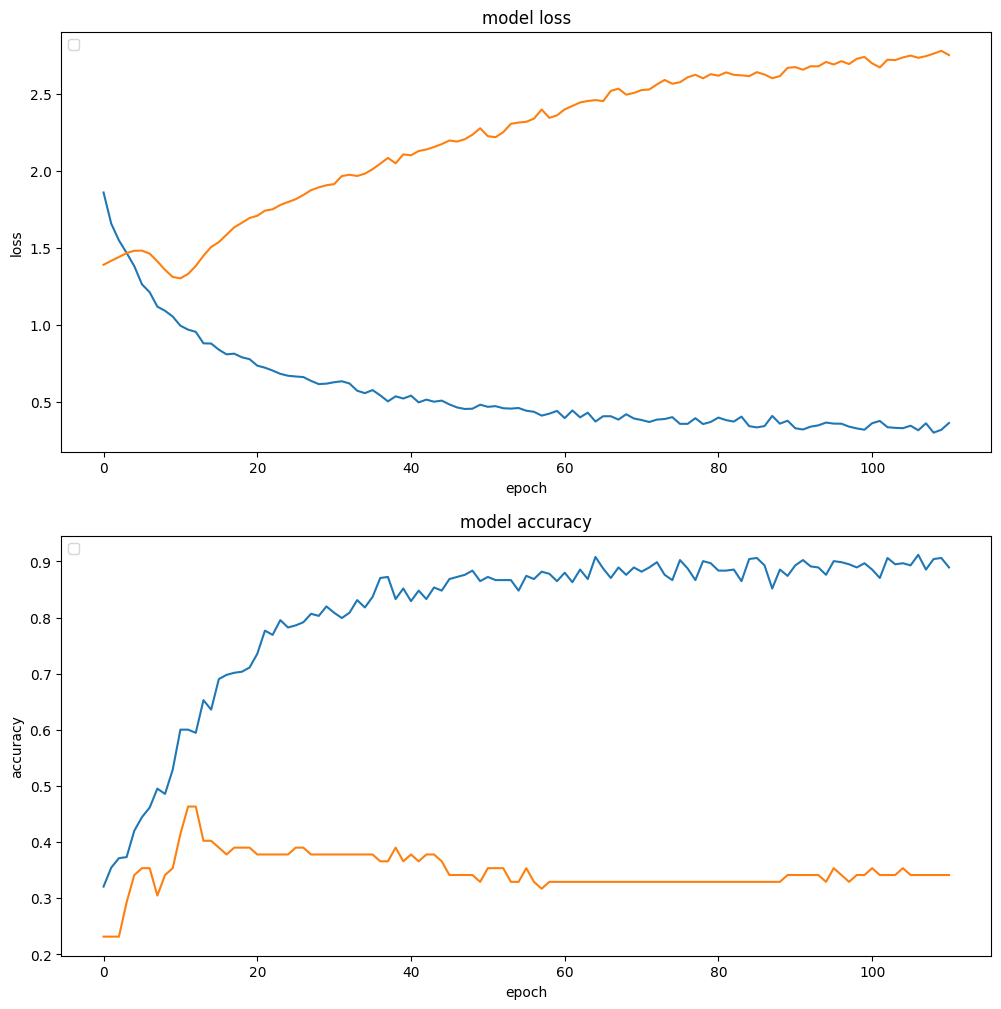

In [101]:
plot_history(history)

Test the model

In [102]:
model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3700 - loss: 1.2519


[1.2472949028015137, 0.38064515590667725]

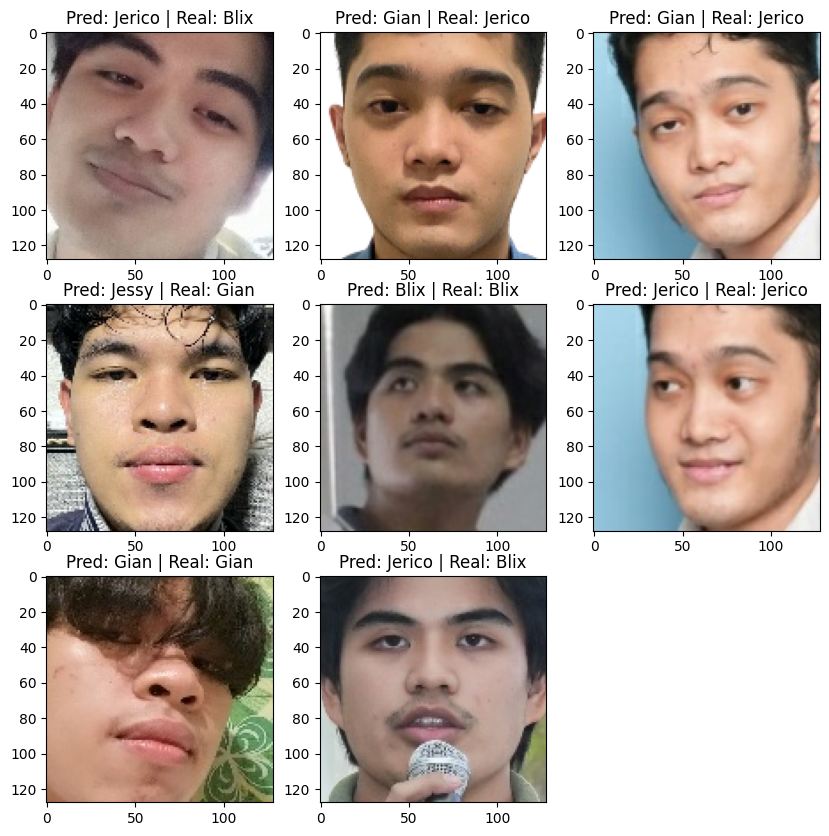

In [83]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(batch_size):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

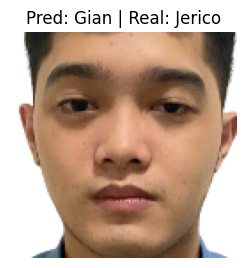

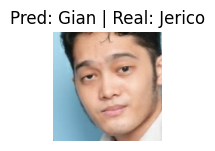

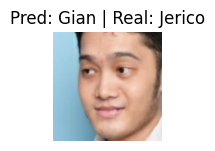

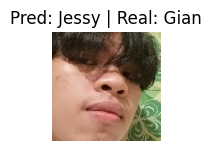

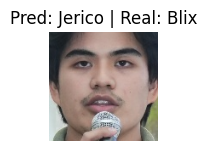

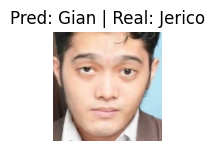

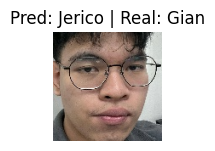

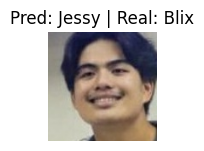

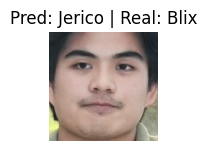

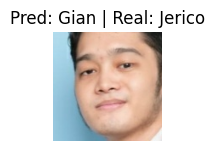

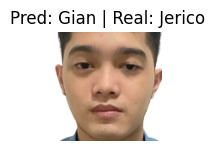

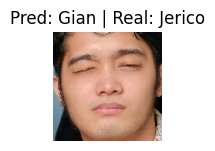

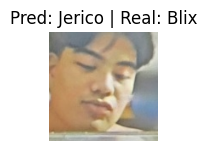

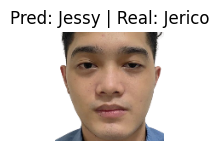

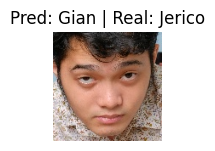

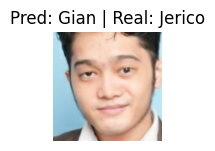

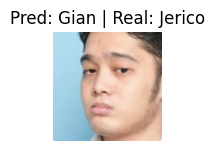

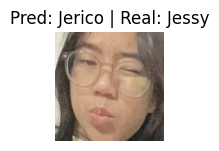

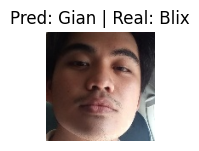

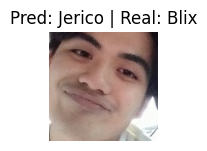

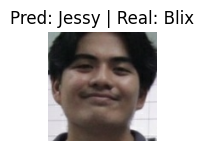

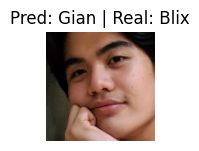

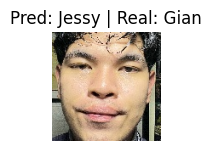

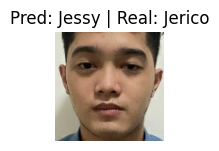

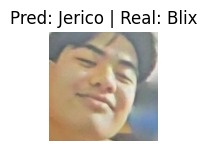

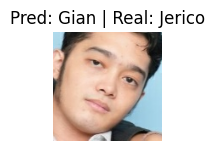

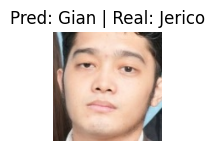

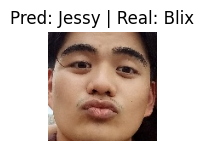

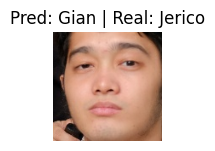

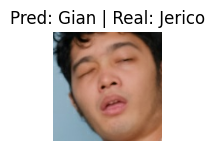

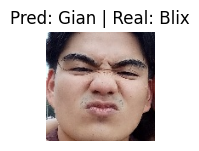

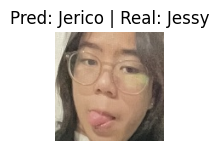

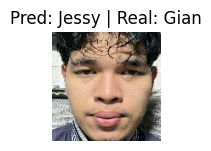

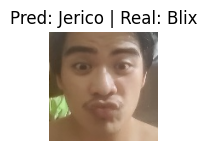

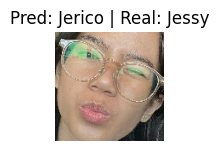

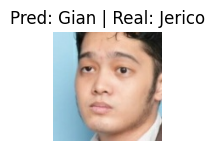

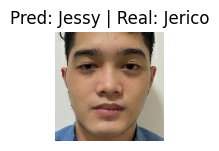

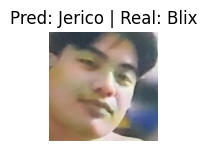

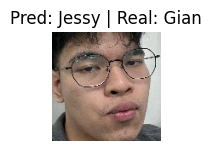

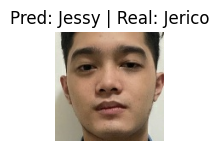

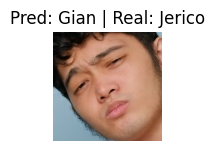

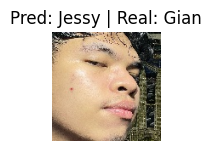

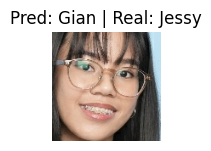

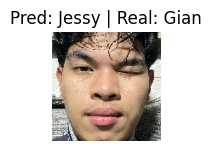

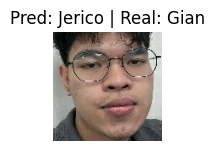

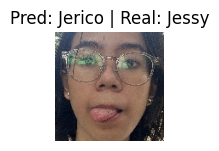

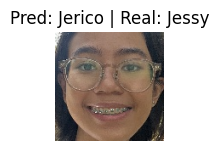

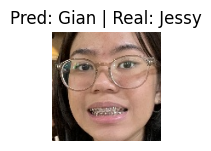

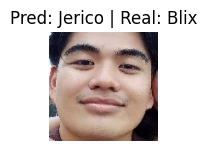

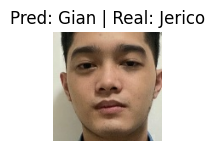

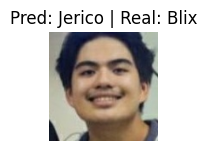

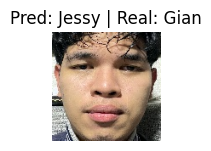

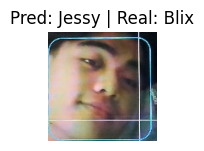

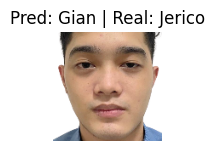

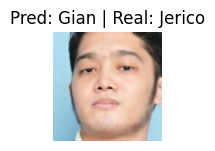

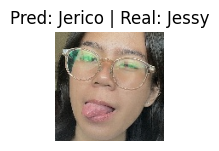

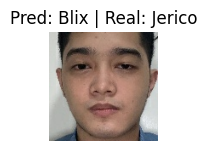

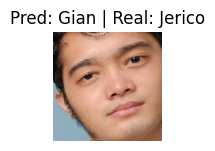

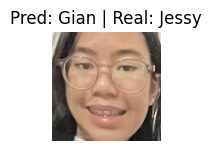

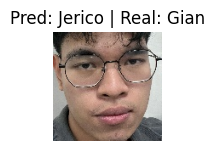

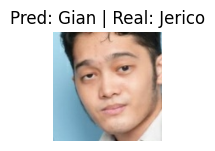

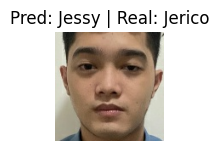

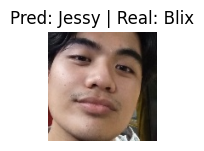

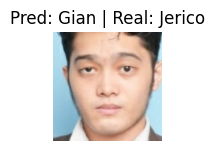

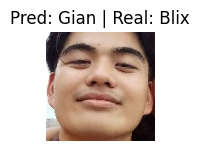

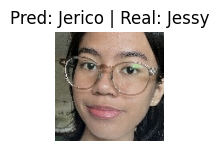

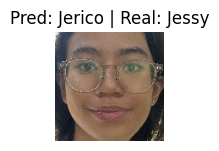

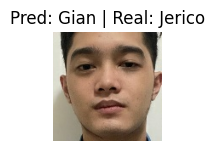

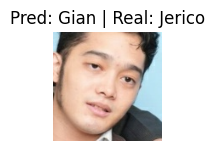

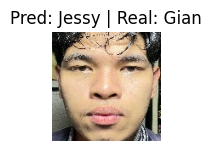

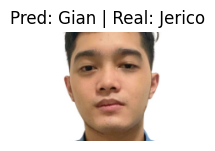

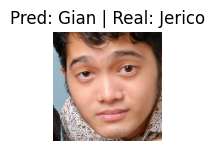

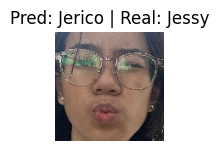

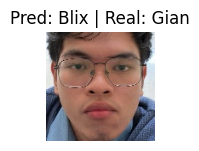

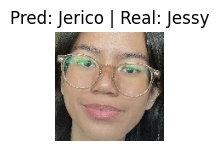

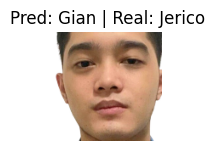

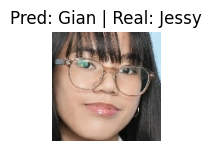

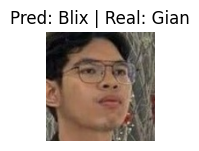

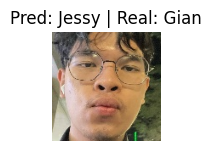

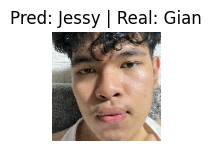

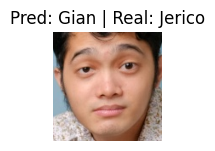

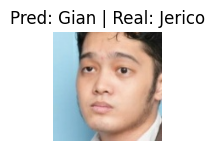

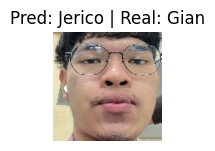

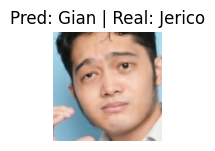

In [58]:
# Plot images where model misclassified
plt.figure(figsize=(10,10))
for images, labels in test_ds:
  classifications = model(images)
  predictions = classifications.numpy().argmax(axis=1)
  misclassified_indices = numpy.where(predictions != labels)[0]
  for i, index in enumerate(misclassified_indices[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title("Pred: " + class_names[predictions[index]] + " | Real: " + class_names[labels[index]])
    plt.axis("off")
    plt.show()

In [103]:
# Print Accuracy Report of Model
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for images, labels in test_ds:
  classifications = model(images)
  predictions = classifications.numpy().argmax(axis=1)
  y_true.extend(labels.numpy())
  y_pred.extend(predictions)

print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Blix       0.62      0.43      0.51        37
        Gian       0.39      0.84      0.53        37
      Jerico       0.31      0.32      0.31        41
       Jessy       0.88      0.17      0.29        40

    accuracy                           0.43       155
   macro avg       0.55      0.44      0.41       155
weighted avg       0.55      0.43      0.41       155



Save the model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpf5x4i5c6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135107769996432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769998352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769997584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769998928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769998160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769999696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769999120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107770000464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107769999888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135107770001232: TensorSpec(shape=(), dtype=tf.resource, name=None)
